## Practical Exercises

We are going to work on a different dataset from the theory. It's a dataset oriented to housing properties on sale in Melbourne, Australia. Each row registers a sold property and each column its properties.

In [1]:
import pandas as pd

melb_housing_df = pd.read_csv("../data/melb_housing_df.csv")

# If you are using google colab use this code to load the dataframe.
# url = "https://raw.githubusercontent.com/benjaminocampo/CDL_data_visualization/main/data/melb_housing_df.csv"
# melb_housing_df = pd.read_csv(url)

/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_79157/858013737.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
melb_housing_df["label"] = (melb_housing_df["housing_price"] > 1000000).replace({True: 1, False: 0})

/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_79157/1132645739.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  melb_housing_df["label"] = (melb_housing_df["housing_price"] > 1000000).replace({True: 1, False: 0})


In [3]:
melb_housing_df["label"].value_counts()

label
0    7837
1    5369
Name: count, dtype: int64

Exercise 0) Split the dataset in train and test set based on the label giving 80/% for the training data and 20/% for the testing data. Use `train_test_split` from `sklearn.model_selection`

Use these columns as feature vectors `[
    'housing_type',
    'housing_selling_method',
    'housing_bathroom_segment',
    'housing_room_segment',
    'housing_cbd_distance',
    'housing_land_size'
]`

Use `label` as y.

In [17]:
cols_to_use = ['housing_type',
    'housing_selling_method',
    'housing_bathroom_segment',
    'housing_room_segment',
    'housing_cbd_distance',
    'housing_land_size']
X, y = melb_housing_df[cols_to_use], melb_housing_df["label"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Exercise 1): You have a dataframe containing information about various housing properties. Your task is to perform feature engineering to prepare the data for machine learning models.

- One-hot encode the following categorical columns:
    `housing_type`, 
    `housing_selling_method`, 
    `housing_bathroom_segment`, 
    `housing_room_segment`

- Keep these numerical columns in the feature set:
    `housing_cbd_distance`
    `housing_land_size`

- Drop all other columns from the dataframe.


Remember to fit the encoders with only the training data.

In [18]:
one_hot_columns = [
    'housing_type',
    'housing_selling_method',
    'housing_bathroom_segment',
    'housing_room_segment'
]

numerical_columns = [
    'housing_cbd_distance',
    'housing_land_size'
]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[one_hot_columns])
X_test_encoded = encoder.transform(X_test[one_hot_columns])


Exercise 2) Apply an standard scaler to only the numerical columns.

Remember to fit the scaler with only the training data.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_numerical_scaled = scaler.fit_transform(X_test[numerical_columns])


Exercise 3) Use the Pipeline class of scikit-learn to apply the transformations in Exercise 1 and 2 and then after standarization add in the pipeline an step of polynomial features of degree 3.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),            # Standardize numerical columns
        ('cat', OneHotEncoder(drop='first', sparse_output=True), one_hot_columns)  # One-hot encode categorical columns
    ]
)

# Build the full pipeline with PolynomialFeatures
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),          # Apply preprocessor (standardization and encoding)
    ('poly', PolynomialFeatures(degree=3))   # Apply PolynomialFeatures with degree=3
])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)


Exercise 4) Calculate the size in MB of the resultant train and test matrices.

In [43]:
train_size_bytes = X_train_processed.shape[0]*X_train_processed.shape[1]*4


In [44]:
# train_size_bytes = X_train_processed.shape[0]*X_train_processed.shape[1]*4
train_size_bytes = X_train_processed.nbytes
test_size_bytes = X_test_processed.nbytes

# Convert bytes to megabytes (1 MB = 1024 * 1024 bytes)
train_size_mb = train_size_bytes / (1024 ** 2)
test_size_mb = test_size_bytes / (1024 ** 2)
train_size_mb, test_size_mb,train_size_bytes

(54.805908203125, 13.7066650390625, 57468160)

Exercise 5) Train a LogisticRegression model on the training set, evaluate on the test set. Make the confusion matrix plot for the predictions on the test set.

In [34]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=3)),
    ('classifier', LogisticRegression(max_iter=1000))  
])

pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)


/Users/mkattel/miniconda3/envs/reg/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1558
           1       0.75      0.73      0.74      1084

    accuracy                           0.79      2642
   macro avg       0.78      0.78      0.78      2642
weighted avg       0.79      0.79      0.79      2642



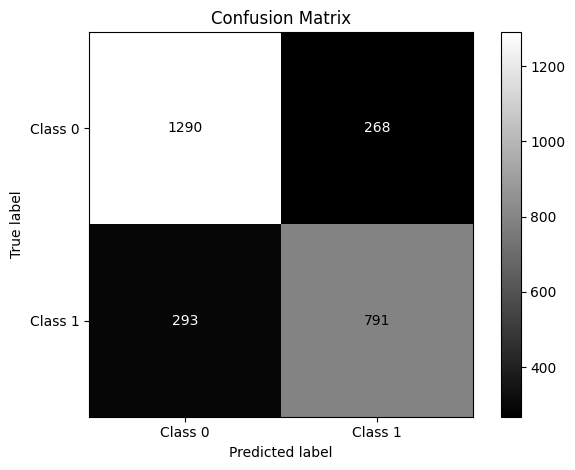

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Classification Report:\n", classification_report(y_test, y_pred))
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=['Class 0', 'Class 1'], cmap="grey")
plt.title('Confusion Matrix')
plt.tight_layout()
